# DBScan

In [1]:
import os
os.getcwd()

'c:\\Users\\PPUNN\\Documents\\gitproject\\stat_assignment2\\clustering'

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics
%matplotlib inline

mpl.font_manager.fontManager.addfont('../thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

In [3]:
orig_df = pd.read_csv("clustering_data.csv")
orig_df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9
1,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6
2,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2
3,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4
4,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7


In [4]:
orig_df.describe()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,27195.485000,6160.595000,19022.945000,27206.26000,19430.800000,99016.085000
std,54545.204505,6930.912416,41009.446754,58029.94422,56140.041536,116020.051845
min,822.000000,531.200000,375.700000,30.70000,79.800000,2279.200000
25%,2295.525000,1416.800000,820.500000,701.77500,709.800000,8108.025000
50%,6904.600000,2514.450000,3377.150000,1941.70000,1556.950000,34313.300000
75%,14581.200000,9455.200000,15075.950000,13447.32500,3102.775000,156841.400000
max,223199.600000,24102.900000,177009.100000,235503.60000,244863.500000,356449.700000


In [5]:
df = orig_df[['งบบุคลากร','งบดําเนินงาน','งบลงทุน', 'งบเงินอุดหนุน','งบรายจ่ายอื่น']]
df

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
0,4104.5,3078.3,6104.3,12397.0,13606.8
1,91027.4,24102.9,14426.1,4794.4,80179.8
2,12988.2,6567.9,3421.2,599.4,244863.5
3,2697.3,2509.6,397.5,1348.7,1203.3
4,1572.6,892.1,1564.4,735.9,1327.7
5,2746.6,2519.3,397.8,16598.3,79.8
6,11248.4,939.9,9956.4,104384.6,1597.7
7,24376.6,11495.8,72292.8,2001.1,564.8
8,9704.7,2436.2,177009.1,57.1,751.6
9,1311.6,2009.9,1243.4,1945.8,1791.0


In [6]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,-0.434334,-0.456270,-0.323200,-0.261830,-0.106436
1,1.200658,2.655987,-0.115004,-0.396245,1.110209
2,-0.267235,0.060293,-0.390326,-0.470413,4.119859
3,-0.460803,-0.540454,-0.465973,-0.457166,-0.333114
4,-0.481959,-0.779892,-0.436780,-0.468000,-0.330840


In [7]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbor_model = neighbors.fit(df_normalized)
distances, indices = neighbor_model.kneighbors(df_normalized)
distances

array([[0.        , 0.30742844],
       [0.        , 2.07304746],
       [0.        , 4.24636778],
       [0.        , 0.08261737],
       [0.        , 0.04861594],
       [0.        , 0.27040136],
       [0.        , 0.77417461],
       [0.        , 1.79144992],
       [0.        , 2.95621947],
       [0.        , 0.07079815],
       [0.        , 0.46343997],
       [0.        , 0.0307278 ],
       [0.        , 0.04765692],
       [0.        , 3.03086549],
       [0.        , 0.55856078],
       [0.        , 0.77417461],
       [0.        , 0.04765692],
       [0.        , 2.74539142],
       [0.        , 2.04051061],
       [0.        , 0.0307278 ]])

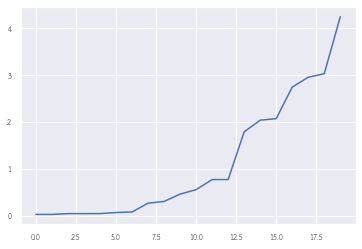

In [8]:
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])

จากกราฟ eps_value จากแกนค่า y ที่มีลักษณะใกล้เคียงกับการตั้งตรงที่สุดอยู่ที่ประมาณ 3

In [9]:
# Choose value for eps and min_samples
eps_value = 3.0
min_sample_value = 4

In [10]:
dbscan=DBSCAN(eps=eps_value,min_samples=min_sample_value)
model=dbscan.fit(df_normalized)

In [11]:
labels = model.labels_
labels

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0], dtype=int64)

In [12]:
cluster_ids = pd.Series(labels).unique()
cluster_ids 

array([ 0, -1], dtype=int64)

In [13]:
n_clusters=len(cluster_ids)-1   # -1 = noise
n_clusters

1

In [14]:
cluster_predictions = dbscan.fit_predict(df_normalized)
df['cluster_id'] = cluster_predictions
df

C:\Users\PPUNN\AppData\Local\Temp/ipykernel_17540/2761561160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_id'] = cluster_predictions


,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
0,4104.5,3078.3,6104.3,12397.0,13606.8,0
1,91027.4,24102.9,14426.1,4794.4,80179.8,0
2,12988.2,6567.9,3421.2,599.4,244863.5,-1
3,2697.3,2509.6,397.5,1348.7,1203.3,0
4,1572.6,892.1,1564.4,735.9,1327.7,0
5,2746.6,2519.3,397.8,16598.3,79.8,0
6,11248.4,939.9,9956.4,104384.6,1597.7,0
7,24376.6,11495.8,72292.8,2001.1,564.8,0
8,9704.7,2436.2,177009.1,57.1,751.6,0
9,1311.6,2009.9,1243.4,1945.8,1791.0,0


## Silhouette_score
ค่ายิ่งใกล้ 1 ยิ่งน่าเชื่อถือ

In [15]:
print(metrics.silhouette_score(df,labels))

0.553517739842751


## Davies_bouldin_score
ค่ายิ่งใกล้ 0 ยิ่งน่าเชื่อถือ 

In [16]:
print(metrics.davies_bouldin_score(df,model.labels_))

1.349223874201033


In [17]:
df.cluster_id.value_counts()

 0    18
-1     2
Name: cluster_id, dtype: int64

## 2 Clusters (Not work 1)

In [18]:
df[df.cluster_id==0].mean()

งบบุคลากร        28420.072222
งบดําเนินงาน      5773.661111
งบลงทุน          18810.905556
งบเงินอุดหนุน    17112.344444
งบรายจ่ายอื่น     6404.894444
cluster_id           0.000000
dtype: float64

In [19]:
orig_df[df.cluster_id==0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9
1,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6
3,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4
4,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7
10,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10992.6,5199.8,10408.8,1103.6,1630.9,29335.7


In [20]:
df[df.cluster_id==-1].mean()

งบบุคลากร         16174.20
งบดําเนินงาน       9643.00
งบลงทุน           20931.30
งบเงินอุดหนุน    118051.50
งบรายจ่ายอื่น    136663.95
cluster_id           -1.00
dtype: float64

In [21]:
orig_df[df.cluster_id==-1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
2,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2
13,กระทรวงมหาดไทย,19360.2,12718.1,38441.4,235503.6,28464.4,334487.7
